(1000, 784)
97


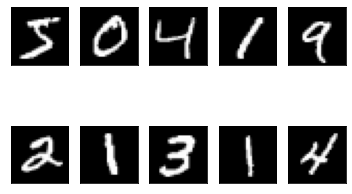

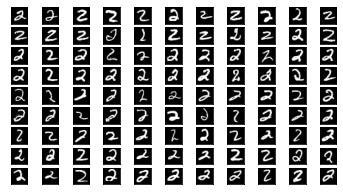

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./', return_X_y=True)
X = X / 255.

# it creates mldata folder in your root project folder
# rescale the data, use the traditional train/test split
# X_train, X_test = X[:60000], X[60000:]
# y_train, y_test = y[:60000], y[60000:]
X_small = X[:1000]
y_small = y[:1000]

print(X_small.shape)

print(len(np.nonzero(y_small.values.astype('int') == 0)[0]))


# display the first 10 digits in the training set
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_small.loc[i].values.reshape((28, 28)), cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

# count number of sampled per category
num_of_sample = []
for i in range(10):
    num_of_sample.append(len(np.nonzero(y_small.values.astype('int') == i)[0]))

# If you want to display all the samples for a specific digit (take '2' for example), the
# following command might help:

plt.figure()
index = np.nonzero(y_small.values.astype('int') == 2)[0]

for i in range(len(index)):
    plt.subplot(11, 11, i+1)
    plt.imshow(X_small.loc[index[i]].values.reshape(28, 28), cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

# Normalization -- x = (x-mean(x)) / std(x)
X_small_norm = np.zeros(X_small.values.shape)
for i in range(X_small.shape[0]):
    X_small_norm[i, :] = (X_small.loc[i].values - np.mean(X_small.loc[i].values)) / np.std(X_small.loc[i].values)

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./', return_X_y=True)
X = X / 255

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import gzip
import os
import struct
import numpy as np
import gzip

def load_mnist_train(path, kind='train'): 
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    #使用gzip打开文件
    with gzip.open(labels_path, 'rb') as lbpath:
        #使用struct.unpack方法读取前两个数据，>代表高位在前，I代表32位整型。lbpath.read(8)表示一次从文件中读取8个字节
        #这样读到的前两个数据分别是magic number和样本个数
        magic, n = struct.unpack('>II',lbpath.read(8))
        #使用np.fromstring读取剩下的数据，lbpath.read()表示读取所有的数据
        labels = np.fromstring(lbpath.read(),dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

def load_mnist_test(path, kind='t10k'): 
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    #使用gzip打开文件
    with gzip.open(labels_path, 'rb') as lbpath:
        #使用struct.unpack方法读取前两个数据，>代表高位在前，I代表32位整型。lbpath.read(8)表示一次从文件中读取8个字节
        #这样读到的前两个数据分别是magic number和样本个数
        magic, n = struct.unpack('>II',lbpath.read(8))
        #使用np.fromstring读取剩下的数据，lbpath.read()表示读取所有的数据
        labels = np.fromstring(lbpath.read(),dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)
    return images, labels


In [5]:
X_train,y_train = load_mnist_train('./data', kind='train')
X_test, y_test = load_mnist_test('./data', kind='t10k')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17240\346994310.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  labels = np.fromstring(lbpath.read(),dtype=np.uint8)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17240\346994310.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  images = np.fromstring(imgpath.read(),dtype=np.uint8).reshape(len(labels), 784)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17240\346994310.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  labels = np.fromstring(lbpath.read(),dtype=np.uint8)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17240\346994310.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, activation='relu', random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.46%


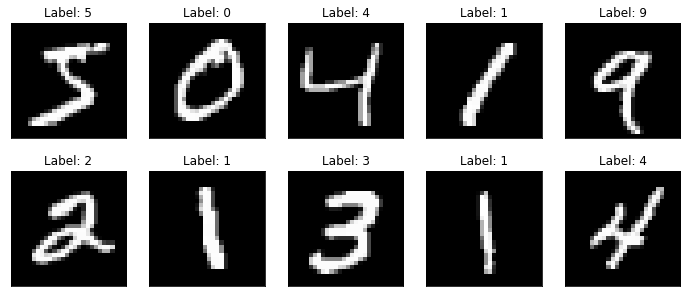

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

sample_images = X[:10].to_numpy()
sample_labels = y[:10].to_numpy()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {sample_labels[i]}")

plt.show()

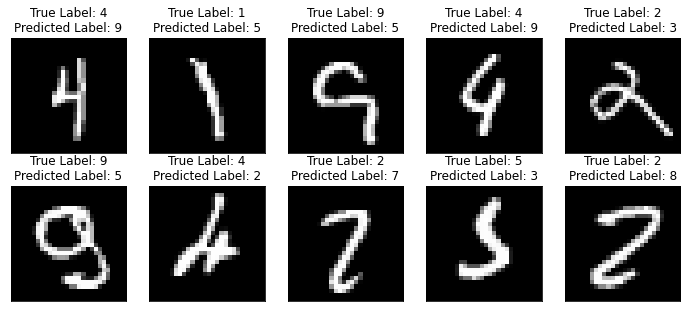

In [8]:
misclassified_indices = []
for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        misclassified_indices.append(i)

num_samples_to_display = 10

plt.figure(figsize=(12, 5))

for i in range(num_samples_to_display):
    plt.subplot(2, 5, i + 1)
    misclassified_index = misclassified_indices[i]
    plt.imshow(X_test[misclassified_index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"True Label: {y_test[misclassified_index]}\nPredicted Label: {y_pred[misclassified_index]}")

plt.show()
